<a href="https://colab.research.google.com/github/pm6022/labnotebooks/blob/main/co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data to manipulate (to avoid repeating the simulation)

In [15]:
!curl -O https://raw.githubusercontent.com/pm6022/labnotebooks/main/sim1/thermodynamics_equilibration_300.dat
!curl -O https://raw.githubusercontent.com/pm6022/labnotebooks/main/sim2/thermodynamics_equilibration_249.58.dat
!curl -O https://raw.githubusercontent.com/pm6022/labnotebooks/main/sim3/thermodynamics_equilibration_200.24.dat

!curl -O https://raw.githubusercontent.com/pm6022/labnotebooks/main/sim1/msd_300.dat
!curl -O https://raw.githubusercontent.com/pm6022/labnotebooks/main/sim2/msd_249.58.dat
!curl -O https://raw.githubusercontent.com/pm6022/labnotebooks/main/sim3/msd_200.24.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  999k  100  999k    0     0  10.3M      0 --:--:-- --:--:-- --:--:-- 10.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1057k  100 1057k    0     0  2007k      0 --:--:-- --:--:-- --:--:-- 2007k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.2M  100 10.2M    0     0  10.6M      0 --:--:-- --:--:-- --:--:-- 10.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4947k  100 4947k    0     0  5848k      0 --:--:-- --:--:-- --:--:-- 5848k
  % Total    % Received % Xferd  Average Speed   Tim

#Lammps Download

In [ ]:
!apt-get install lammps

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-mathjax javascript-common lammps-doc libjs-jquery libjs-mathjax
  libjs-underscore
Suggested packages:
  apache2 | lighttpd | httpd fonts-mathjax-extras fonts-stix libjs-mathjax-doc
The following NEW packages will be installed:
  fonts-mathjax javascript-common lammps lammps-doc libjs-jquery libjs-mathjax
  libjs-underscore
0 upgraded, 7 newly installed, 0 to remove and 31 not upgraded.
Need to get 52.0 MB of archives.
After this operation, 113 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-mathjax all 2.7.3+dfsg-1 [2,208 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 javascript-common all 11 [6,066 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libjs-jquery all 3.2.1-1 [152 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libjs-und

#First Simulation run ($\rho=\frac{2,7Kg}{m^{3}}$)

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in CO2_in.LJ_3D_NVT

Output streaming troncato alle ultime 5000 righe.
19548100 90564767.9229993
19548200 90565171.4305763
19548300 90565574.7219562
19548400 90565973.3777104
19548500 90566366.6390809
19548600 90566760.9438153
19548700 90567155.6674992
19548800 90567549.1590931
19548900 90567944.3735423
19549000 90568338.8593536
19549000 -5.13674842562944 882.605162200555 887.741910626184 296.392133692453 1.48933414622205 27000000
19549100 90568733.7044482
19549200 90569132.4331304
19549300 90569531.8122403
19549400 90569929.6537542
19549500 90570326.4712082
19549600 90570721.8277972
19549700 90571124.6808531
19549800 90571541.6673449
19549900 90571962.3456151
19550000 90572384.4955587
19550000 -5.4424172840327 902.672761669466 908.115178953499 303.131136453151 1.5282223158688 27000000
19550100 90572811.6345553
19550200 90573237.6388057
19550300 90573663.179411
19550400 90574085.8667672
19550500 90574508.1717552
19550600 90574933.1918023
19550700 90575359.2538961
19550800 90575785.8606948
19550900 90576212

# Data manipulation ($\rho=\frac{2,7Kg}{m^{3}}$)

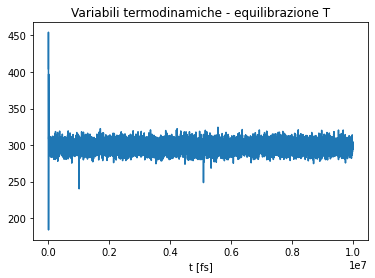

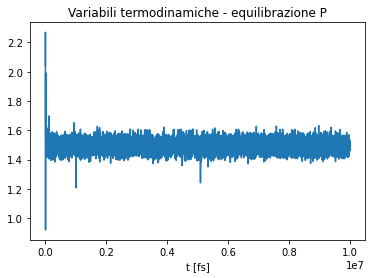

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


THERMO_file = np.genfromtxt('thermodynamics_equilibration_300.dat',  delimiter=" ")
time = THERMO_file[:, 0]

T1 = THERMO_file[:, 4]
P1 = THERMO_file[:, 5]
V1 = THERMO_file[:, 6]
plt.figure(1)
plt.title("Variabili termodinamiche - equilibrazione T")
plt.xlabel("t [fs]")
plt.plot(time, T1)

plt.figure(2)
plt.title("Variabili termodinamiche - equilibrazione P")
plt.xlabel("t [fs]")
plt.plot(time, P1)

plt.show()

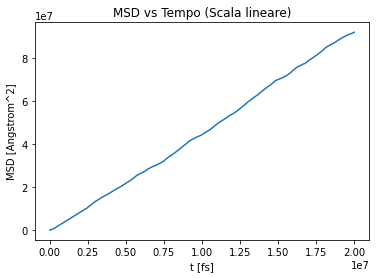

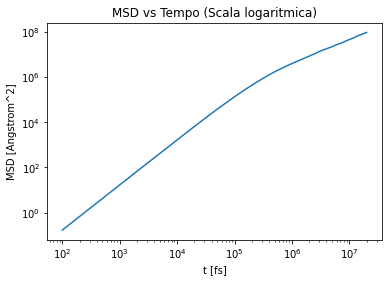

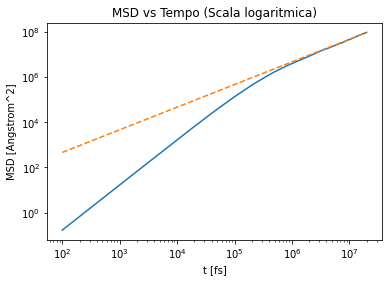

In [17]:
MSD_file = np.genfromtxt('msd_300.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D1):
  return 6*D1*t

D1, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D1), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")
#xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
plt.show()

In [33]:
D_sim_1 = D1[0]*10 #conversione in millimetriquadri al secondo
P_sim_1 = P1.mean()
T_sim_1 = T1.mean()
V_sim_1 = V1.mean()*10**(-27) #conversione in litri

P_ideal_1 = (1000/(6.022*10**23))*0.0821*T_sim_1/V_sim_1

print('D1:', D_sim_1,'mm^2/s') 
print('T1:', T_sim_1,'K') 
print('V1:', V_sim_1,'L') 
print('P1:', P_sim_1,'atm') 
print('P1_ideal:', P_ideal_1,'atm') 


D1: 7.643289420407461 mm^2/s
T1: 297.950463483503 K
V1: 2.7e-20 L
P1: 1.4935202859647267 atm
P1_ideal: 1.5044671422066986 atm


#Second Simulation run ($\rho=\frac{4,7Kg}{m^{3}}; dt=0,1fs$)

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in CO201_in.LJ_3D_NVT

Output streaming troncato alle ultime 5000 righe.
1954810 4998185.29785805
1954820 4998215.24286341
1954830 4998245.24928931
1954840 4998275.43370667
1954850 4998305.30742504
1954860 4998335.42080511
1954870 4998365.44590003
1954880 4998395.50680068
1954890 4998425.55003727
1954900 4998455.51767482
1954900 -12.2865213643104 891.178237860293 903.464759224603 299.271101883349 2.59035449776541 15546382.225912
1954910 4998485.54242539
1954920 4998515.48953296
1954930 4998545.41248188
1954940 4998575.41206922
1954950 4998605.33977433
1954960 4998635.27095156
1954970 4998665.22330981
1954980 4998695.31102307
1954990 4998725.166683
1955000 4998755.06544973
1955000 -12.612737366123 880.522596570627 893.13533393675 295.692776723964 2.54195561808227 15546382.225912
1955010 4998785.07786772
1955020 4998815.00732458
1955030 4998844.90528436
1955040 4998874.82830302
1955050 4998904.82695404
1955060 4998934.8163011
1955070 4998964.8378127
1955080 4998994.85176329
1955090 4999024.82940188
1955100 499

In [ ]:
#anali seconda simulazione

# Data manipulation ($\rho=\frac{4,7Kg}{m^{3}}$)

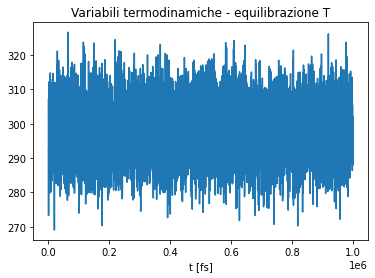

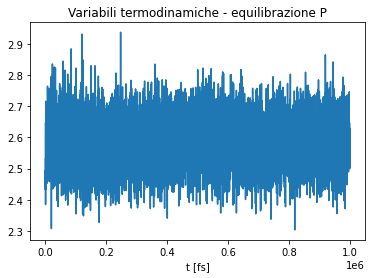

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


THERMO_file = np.genfromtxt('thermodynamics_equilibration_249.58.dat',  delimiter=" ")
time = THERMO_file[:, 0]

T2 = THERMO_file[:, 4]
P2 = THERMO_file[:, 5]
V2 = THERMO_file[:, 6]
plt.figure(1)
plt.title("Variabili termodinamiche - equilibrazione T")
plt.xlabel("t [fs]")
plt.plot(time, T2)

plt.figure(2)
plt.title("Variabili termodinamiche - equilibrazione P")
plt.xlabel("t [fs]")
plt.plot(time, P2)

plt.show()

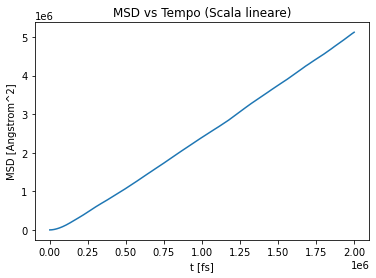

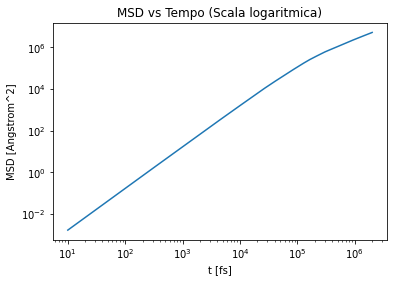

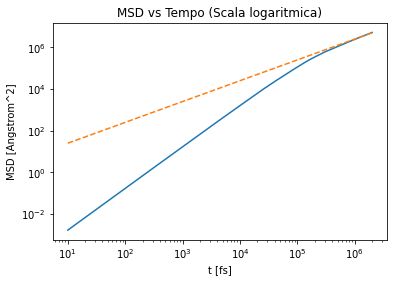

In [36]:
MSD_file = np.genfromtxt('msd_249.58.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D2):
  return 6*D2*t

D2, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D2), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

plt.show()

In [37]:
D_sim_2 = D2[0]*10 #conversione in millimetriquadri al secondo
P_sim_2 = P2.mean()
T_sim_2 = T2.mean()
V_sim_2 = V2.mean()*10**(-27) #conversione in litri

P_ideal_2 = (1000/(6.022*10**23))*0.0821*T_sim_2/V_sim_2

print('D2:', D_sim_2,'mm^2/s') 
print('T2:', T_sim_2,'K') 
print('V2:', V_sim_2,'L') 
print('P2:', P_sim_2,'atm') 
print('P2_ideal:', P_ideal_2,'atm')


D2: 4.1313944802914895 mm^2/s
T2: 298.0041690876727 K
V2: 1.5546382225912004e-20 L
P2: 2.5814737947792934 atm
P2_ideal: 2.6133369242552584 atm


#Third Simulation run ($\rho=\frac{9,1Kg}{m^{3}}; dt=0,01fs$)

In [ ]:
!mpirun --allow-run-as-root -np 2 lammps -in CO2001_in.LJ_3D_NVT

Output streaming troncato alle ultime 5000 righe.
195481 204290.721445424
195482 204292.009955611
195483 204293.265787609
195484 204294.521998346
195485 204295.796638789
195486 204297.082253945
195487 204298.351721498
195488 204299.59542483
195489 204300.862650633
195490 204302.155602571
195490 -23.4533318185262 908.954442290562 932.407774109088 305.240619608472 5.13104109458873 8028834.573824
195491 204303.431816479
195492 204304.690959647
195493 204305.959655615
195494 204307.261127812
195495 204308.550779409
195496 204309.810105211
195497 204311.077368135
195498 204312.360987389
195499 204313.64192137
195500 204314.893907756
195500 -23.6639694157332 845.59044403431 869.254413450043 283.962032708265 4.75990993331452 8028834.573824
195501 204316.144734713
195502 204317.4319112
195503 204318.717312821
195504 204319.983376166
195505 204321.243317761
195506 204322.528138616
195507 204323.832750486
195508 204325.104867246
195509 204326.366976788
195510 204327.641034959
195510 -23.87216858

# Data manipulation ($\rho=\frac{9,1Kg}{m^{3}}$)

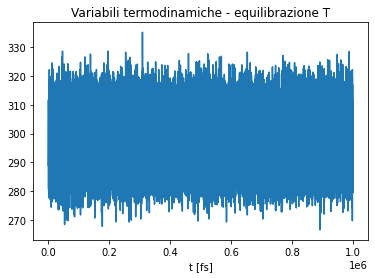

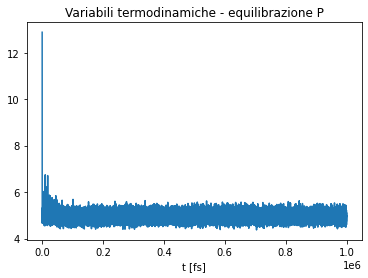

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


THERMO_file = np.genfromtxt('thermodynamics_equilibration_200.24.dat',  delimiter=" ")
time = THERMO_file[:, 0]

T3 = THERMO_file[:, 4]
P3 = THERMO_file[:, 5]
V3 = THERMO_file[:, 6]
plt.figure(1)
plt.title("Variabili termodinamiche - equilibrazione T")
plt.xlabel("t [fs]")
plt.plot(time, T3)

plt.figure(2)
plt.title("Variabili termodinamiche - equilibrazione P")
plt.xlabel("t [fs]")
plt.plot(time, P3)

plt.show()

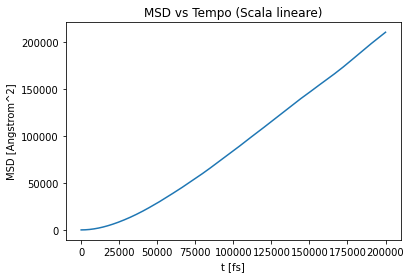

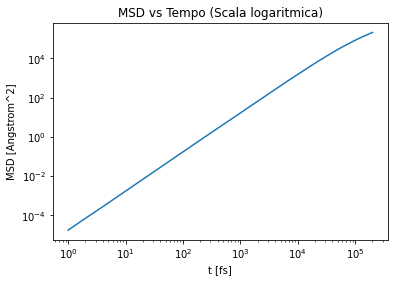

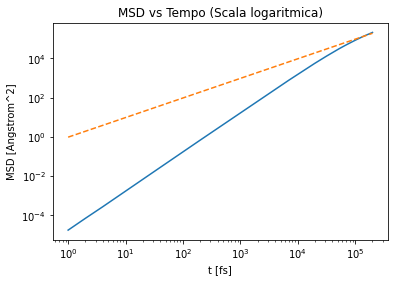

In [39]:
MSD_file = np.genfromtxt('msd_200.24.dat', delimiter=' ')
time = MSD_file[:, 0]
msd = MSD_file[:, 1]
plt.figure(1)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala lineare)")
plt.plot(time,msd)

plt.figure(2)
plt.loglog(time,msd)
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

def linea_retta(t,D3):
  return 6*D3*t

D3, err = curve_fit(linea_retta,time,msd)
plt.figure(3)
plt.loglog(time,msd)
plt.loglog(time,linea_retta(time,D3), '--')
plt.xlabel("t [fs]")
plt.ylabel("MSD [Angstrom^2]")
plt.title("MSD vs Tempo (Scala logaritmica)")

plt.show()

In [41]:
D_sim_3 = D3[0]*10 #conversione in millimetriquadri al secondo
P_sim_3 = P3.mean()
T_sim_3 = T3.mean()
V_sim_3 = V3.mean()*10**(-27) #conversione in litri

P_ideal_3 = (1000/(6.022*10**23))*0.0821*T_sim_3/V_sim_3

print('D3:', D_sim_3,'mm^2/s') 
print('T3:', T_sim_3,'K') 
print('V3:', V_sim_3,'L') 
print('P3:', P_sim_3,'atm') 
print('P3_ideal:', P_ideal_3,'atm')


D3: 1.5858760994766385 mm^2/s
T3: 297.9906829539198 K
V3: 8.028834573824002e-21 L
P3: 4.957562161732947 atm
P3_ideal: 5.060024057657306 atm


# commento finale